## Libraries 

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

#preprocessing
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn import set_config
set_config(display='diagram')

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline



In [14]:
import sklearn
print(sklearn.__version__)

1.5.1


In [2]:
from src.load_data import load_data
file_path = '../data/raw/flight_df (2).csv'
df = load_data(file_path)

df.head()

,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Loyal Customer,Business Travel,satisfied
0,26,3,2062,2,3,3,3,2,2,2,...,3,3,3,2,0,0,0,1,1,0
1,52,3,680,5,5,5,5,3,4,4,...,4,4,4,4,18,2,0,1,1,1
2,28,1,188,3,5,3,4,3,3,3,...,4,4,5,3,0,0,1,1,0,0
3,54,3,453,3,5,5,5,3,4,4,...,3,4,3,1,91,80,0,1,1,0
4,40,1,775,4,3,3,3,4,4,4,...,3,3,3,4,0,0,1,1,1,0


## Model Validation


In [3]:
y = df['satisfied']
X = df.drop(columns='satisfied')

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
#check for class imbalance
y.value_counts(normalize=True)

satisfied
0    0.56695
1    0.43305
Name: proportion, dtype: float64

## Preprocessing 

In [6]:
from imblearn.pipeline import Pipeline as ImbPipeline

#function to create preprocessing pipeline 
def create_preprocessing_pipeline():
    num_cols = make_column_selector(dtype_include='number')
    cat_cols = make_column_selector(dtype_include='object')

    num_pipe = ImbPipeline([
        ('imputer', KNNImputer()),
         ('scaler', StandardScaler())
])
    cat_pipe = ImbPipeline([
        ('encoding', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
        ])

    preprocessor = ColumnTransformer([
        ('numeric', num_pipe, num_cols),
        ('categorical', cat_pipe, cat_cols)
        ])

    return preprocessor

In [7]:
preprocessor = create_preprocessing_pipeline()

In [8]:
# def make_sampler_pipeline(sampler):
#     return ImbPipeline([
#         ('sampler', sampler)
#         ])

# #function to preprocess and rebalance the data
# def preprocess_and_rebalance(preprocessor, X_train, X_test, y_train):
    
#     #transform the training into the fitted transformer
#     X_train_transformed = preprocessor.fit_transform(X_train)
#     X_test_transformed = preprocessor.transform(X_test)

#     #create a sampling pipeline
#     sampler = make_sampler_pipeline(SMOTE(random_state=42))

#     #fitting the sampler to the training data
#     X_train_balanced, y_train_balanced = sampler.fit_transform(X_train_transformed, y_train)
    
#     return X_train_balanced, X_test_transformed, y_train_balanced

# Function to create and return a pipeline using ImbPipeline
def make_sampler_pipeline(sampler):
    return ImbPipeline([
        ('sampler', sampler)
        ])
    
# Function to preprocess and rebalance the data
def preprocess_and_rebalance_data(preprocessor, X_train, X_test, y_train):
    
    # Transform the training data into the fitted transformer
    X_train_transformed = preprocessor.fit_transform(X_train)
    X_test_transformed = preprocessor.transform(X_test)
    
    # Create a sampling pipeline and use SMOTE
    sampler = make_sampler_pipeline(SMOTE(random_state=42))
    
    # Balance the training data 
    X_train_balanced, y_train_balanced = sampler.fit_resample(X_train_transformed, y_train)
    
    return X_train_balanced, X_test_transformed, y_train_balanced

In [9]:
X_train_balanced, X_test_transformed, y_train_balanced = preprocess_and_rebalance_data(preprocessor, X_train, X_test, y_train)

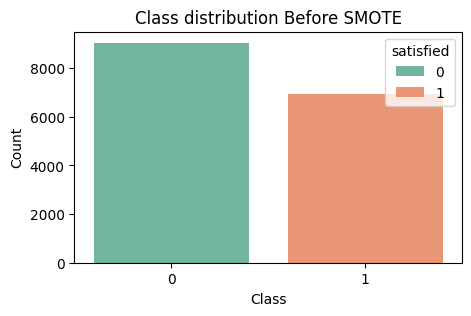

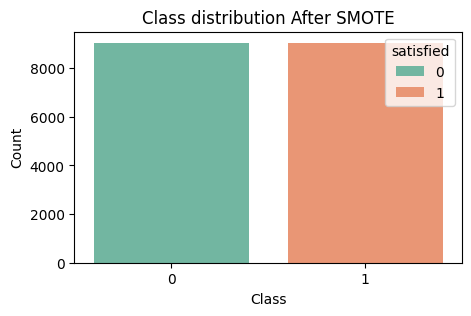

In [10]:
#visualize the data before and after smote
def plot_class_distribution(y, title):
    plt.figure(figsize=(5,3))
    sns.countplot(x=y, palette='Set2', hue=y)
    plt.title(title)
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.show()

#before smote
plot_class_distribution(y_train, 'Class distribution Before SMOTE')

plot_class_distribution(y_train_balanced, 'Class distribution After SMOTE')